<a href="https://colab.research.google.com/github/mrjakhi/SIADS-capstone-building-damage-detection-TEAM-GOONERS-/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import os
import random
import shutil
import time
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from PIL import Image
import shapely.wkt
from tqdm import tqdm
import seaborn as sns
import sys
import os
from google.colab import drive

# Connect to G drive 

In [2]:
## connect to google drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
sys.path.append('/content/gdrive/My Drive/MADS_CourseWork/Capstone/Capstone/')
files = os.listdir("/content/gdrive/My Drive/MADS_CourseWork/Capstone/Capstone/")
files

['train',
 'test',
 'hold',
 'main.py',
 'Data',
 '__pycache__',
 'EDA.ipynb',
 'main_mod_Collab.py']

In [4]:
train_images = os.listdir("/content/gdrive/My Drive/MADS_CourseWork/Capstone/Capstone/Data/train/images")
train_labels =  os.listdir("/content/gdrive/My Drive/MADS_CourseWork/Capstone/Capstone/Data/train/labels")
print("Number of images for traininig: ", len(train_images))

Number of images for traininig:  5598


# Importing libraries and functions


In [5]:
from main_mod_Collab import ann_dictionary_ann_df
from main_mod_Collab import view_pre_post

# Train df 

In [6]:
train_images_path = r"/content/gdrive/My Drive/MADS_CourseWork/Capstone/Capstone/Data/train/images"
test_images_path = r"/content/gdrive/My Drive/MADS_CourseWork/Capstone/Capstone/Data/test/images"
hold_images_path = r"/content/gdrive/My Drive/MADS_CourseWork/Capstone/Capstone/Data/hold/images"
tier3_images_path = r"/content/gdrive/My Drive/MADS_CourseWork/Capstone/Capstone/Data/tier3/images"


train_labels_path =  r"/content/gdrive/My Drive/MADS_CourseWork/Capstone/Capstone/Data/train/labels"
test_labels_path = r"/content/gdrive/My Drive/MADS_CourseWork/Capstone/Capstone/Data/test/labels"
hold_labels_path = r"/content/gdrive/My Drive/MADS_CourseWork/Capstone/Capstone/Data/hold/labels"
tier3_labels_path = r"/content/gdrive/My Drive/MADS_CourseWork/Capstone/Capstone/Data/tier3/labels"


print(train_images_path)

/content/gdrive/My Drive/MADS_CourseWork/Capstone/Capstone/Data/train/images


In [7]:
train_df = ann_dictionary_ann_df(train_labels_path)

Loading annotations into memory...
Done (t=27.99s)
Creating annotation dataframe...
Done (t=10.50s)


In [8]:
train_df

,obj_type,img_id,type,pixwkt,geowkt,dmg_cat,uid,sensor,provider_asset_type,gsd,capture_date,off_nadir_angle,pan_resolution,sun_azimuth,sun_elevation,target_azimuth,disaster,disaster_type,catalog_id,original_width,original_height,width,height,id,img_name
0,building,00000000,post,"POLYGON ((532.1863714054954 165.9824503000504,...",POLYGON ((-90.81544679490855 14.39086318334812...,no-damage,486b0813-ecd2-4b84-856c-9c0e42156953,WORLDVIEW03_VNIR,WORLDVIEW03_VNIR,1.408524,2018-06-22T16:55:40.000Z,21.97336,0.351739,58.571484,71.182274,314.29373,guatemala-volcano,volcano,104001003E575F00,1024,1024,1024,1024,MjU0NzE2NA.73QhG8U-LJLGkyNS0FB24X8vQS8,guatemala-volcano_00000000_post_disaster.png
1,building,00000000,post,"POLYGON ((810.6063087761681 743.0540229226118,...",POLYGON ((-90.81420592027385 14.38829423654861...,no-damage,139cf2c8-ad52-4739-82b5-bb646b215e76,WORLDVIEW03_VNIR,WORLDVIEW03_VNIR,1.408524,2018-06-22T16:55:40.000Z,21.97336,0.351739,58.571484,71.182274,314.29373,guatemala-volcano,volcano,104001003E575F00,1024,1024,1024,1024,MjU0NzE2NA.73QhG8U-LJLGkyNS0FB24X8vQS8,guatemala-volcano_00000000_post_disaster.png
2,building,00000000,post,"POLYGON ((1023.496880254201 854.6598863601454,...","POLYGON ((-90.81324289816379 14.3877907147159,...",no-damage,d43deb4a-529c-4df4-b666-26dd5b17e040,WORLDVIEW03_VNIR,WORLDVIEW03_VNIR,1.408524,2018-06-22T16:55:40.000Z,21.97336,0.351739,58.571484,71.182274,314.29373,guatemala-volcano,volcano,104001003E575F00,1024,1024,1024,1024,MjU0NzE2NA.73QhG8U-LJLGkyNS0FB24X8vQS8,guatemala-volcano_00000000_post_disaster.png
3,building,00000000,post,"POLYGON ((1023.496779355264 937.0904197282952,...",POLYGON ((-90.81324645425258 14.38742543063536...,no-damage,563b145d-732d-4eb4-8c77-380519842324,WORLDVIEW03_VNIR,WORLDVIEW03_VNIR,1.408524,2018-06-22T16:55:40.000Z,21.97336,0.351739,58.571484,71.182274,314.29373,guatemala-volcano,volcano,104001003E575F00,1024,1024,1024,1024,MjU0NzE2NA.73QhG8U-LJLGkyNS0FB24X8vQS8,guatemala-volcano_00000000_post_disaster.png
4,building,00000000,post,"POLYGON ((1023.49670602115 988.0186053329112, ...",POLYGON ((-90.81324865131654 14.38719974659386...,no-damage,56f51b26-d511-461d-bb31-747901a4ea75,WORLDVIEW03_VNIR,WORLDVIEW03_VNIR,1.408524,2018-06-22T16:55:40.000Z,21.97336,0.351739,58.571484,71.182274,314.29373,guatemala-volcano,volcano,104001003E575F00,1024,1024,1024,1024,MjU0NzE2NA.73QhG8U-LJLGkyNS0FB24X8vQS8,guatemala-volcano_00000000_post_disaster.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325569,building,00001397,pre,"POLYGON ((948.0944354611244 926.0325910506685,...",POLYGON ((-118.7207220434946 34.03458734714199...,none,b5914bf1-9a0e-4dbc-9859-eaac05a9ef21,WORLDVIEW02,WORLDVIEW02,1.900348,2018-10-23T18:50:43.000Z,8.88540,0.474044,163.849060,42.730503,302.29950,socal-fire,fire,1030010085017B00,1024,1024,1024,1024,MjU3ODIzNA.AkzdaabZwCkpmhgn7MuwPq6uF84,socal-fire_00001397_pre_disaster.png
325570,building,00001397,pre,"POLYGON ((246.0587158227871 728.4964513479449,...",POLYGON ((-118.7242196184358 34.03535402921331...,none,5ad5fe97-038f-4bbc-aeee-82b790d43b03,WORLDVIEW02,WORLDVIEW02,1.900348,2018-10-23T18:50:43.000Z,8.88540,0.474044,163.849060,42.730503,302.29950,socal-fire,fire,1030010085017B00,1024,1024,1024,1024,MjU3ODIzNA.AkzdaabZwCkpmhgn7MuwPq6uF84,socal-fire_00001397_pre_disaster.png
325571,building,00001397,pre,"POLYGON ((254.7285181812857 725.2394436973794,...",POLYGON ((-118.7241769006129 34.03536807765626...,none,05a2ca67-92d8-4143-ac6f-3688bf0ae1f0,WORLDVIEW02,WORLDVIEW02,1.900348,2018-10-23T18:50:43.000Z,8.88540,0.474044,163.849060,42.730503,302.29950,socal-fire,fire,1030010085017B00,1024,1024,1024,1024,MjU3ODIzNA.AkzdaabZwCkpmhgn7MuwPq6uF84,socal-fire_00001397_pre_disaster.png
325572,building,00001397,pre,"POLYGON ((395.0661334698472 596.7989554394592,...",POLYGON ((-118.7234917508879 34.03590805900979...,none,46bc5b42-a26d-4105-9b20-02d627057e70,WORLDVIEW02,WORLDVIEW02,1.900348,2018-10-23T18:50:43.000Z,

In [9]:
print("train df length : ", len(train_df))

train df length :  325574


In [10]:
print("df unique rows : ", train_df['uid'].nunique())

df unique rows :  162787


In [11]:
print("df columns : ", train_df.columns)

df columns :  Index(['obj_type', 'img_id', 'type', 'pixwkt', 'geowkt', 'dmg_cat', 'uid',
       'sensor', 'provider_asset_type', 'gsd', 'capture_date',
       'off_nadir_angle', 'pan_resolution', 'sun_azimuth', 'sun_elevation',
       'target_azimuth', 'disaster', 'disaster_type', 'catalog_id',
       'original_width', 'original_height', 'width', 'height', 'id',
       'img_name'],
      dtype='object')


In [12]:
print("Unique disasters types in df : ", train_df['disaster_type'].unique())

Unique disasters types in df :  ['volcano' 'flooding' 'wind' 'earthquake' 'tsunami' 'fire']


In [13]:
print("Unique disasters in df : ", train_df['disaster'].unique())

Unique disasters in df :  ['guatemala-volcano' 'hurricane-florence' 'hurricane-harvey'
 'hurricane-matthew' 'hurricane-michael' 'mexico-earthquake'
 'midwest-flooding' 'palu-tsunami' 'santa-rosa-wildfire' 'socal-fire']


In [14]:
print("Unique damage cat in df : ", train_df['dmg_cat'].unique())

Unique damage cat in df :  ['no-damage' 'none' 'minor-damage' 'destroyed' 'major-damage'
 'un-classified']


# Pre-post disaster visualization

hurricane-harvey_00000012_pre_disaster.png


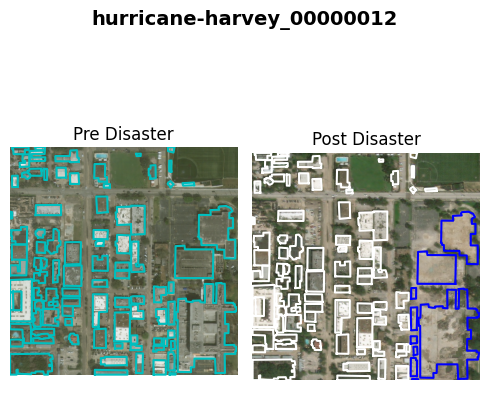

In [15]:
# %matplotlib inline
view_pre_post(train_df, train_images_path, disaster="hurricane-harvey", imid="00000012")

# hurricane-harvey_00000012_pre_disaster
# guatemala-volcano_00000023_post_disaster
# mexico-earthquake_00000074_pre_disaster
# socal-fire_00000442_pre_disaster
# palu-tsunami_00000107_post_disaster

# Analyzing a single json file

In [16]:
# single jason file related to guatemala-volcano
jason_path = '/content/gdrive/My Drive/MADS_CourseWork/Capstone/Capstone/Data/train/labels/guatemala-volcano_00000015_pre_disaster.json'

In [17]:
with open(jason_path) as f:
  label_json = json.load(f)

In [18]:
print(label_json.keys()) 
print(label_json['features'].keys())
print(label_json['metadata'].keys())

dict_keys(['features', 'metadata'])
dict_keys(['lng_lat', 'xy'])
dict_keys(['sensor', 'provider_asset_type', 'gsd', 'capture_date', 'off_nadir_angle', 'pan_resolution', 'sun_azimuth', 'sun_elevation', 'target_azimuth', 'disaster', 'disaster_type', 'catalog_id', 'original_width', 'original_height', 'width', 'height', 'id', 'img_name'])


In [19]:
label_json['features']['xy'][1]

{'properties': {'feature_type': 'building',
  'uid': 'ac83c6cd-25ac-47d7-90aa-be52d45097ac'},
 'wkt': 'POLYGON ((481.0148884250907 687.2893687194741, 467.3890788775345 693.5664270503709, 463.2554063181636 685.2990819316288, 491.7318172827191 672.8980642535159, 497.8557766299354 688.361061605237, 483.4644721639772 694.1788229850924, 481.0148884250907 687.2893687194741))'}

# Data aggregation

In [27]:
test_df = ann_dictionary_ann_df(test_labels_path)

hold_df = ann_dictionary_ann_df(hold_labels_path)

# tier3_df = ann_dictionary_ann_df(tier3_labels_path)

Loading annotations into memory...
Done (t=5.01s)
Creating annotation dataframe...
Done (t=4.21s)
Loading annotations into memory...
Done (t=4.73s)
Creating annotation dataframe...
Done (t=3.38s)
Loading annotations into memory...
Done (t=270.35s)
Creating annotation dataframe...
Done (t=13.18s)


In [28]:
print("test df length : ", len(test_df))
print("hold df length : ", len(hold_df))
print("tier3 df length : ", len(tier3_df))


test df length :  109724
hold df length :  108784
tier3 df length :  306654


In [30]:
# df_all = train_df.merge(test_df, on='uid').merge(hold_df, on='uid')
# df_all_4 = pd.concat([train_df, test_df, hold_df, tier3_df])
df_all = pd.concat([train_df, test_df, hold_df])


len(df_all)
print("Unique disasters types : ", df_all['disaster_type'].unique())
print("Unique disasters : ", df_all['disaster'].unique())
print("Unique damage category : ", train_df['dmg_cat'].unique())

Unique disasters types :  ['volcano' 'flooding' 'wind' 'earthquake' 'tsunami' 'fire']
Unique disasters :  ['guatemala-volcano' 'hurricane-florence' 'hurricane-harvey'
 'hurricane-matthew' 'hurricane-michael' 'mexico-earthquake'
 'midwest-flooding' 'palu-tsunami' 'santa-rosa-wildfire' 'socal-fire']
Unique damage category :  ['no-damage' 'none' 'minor-damage' 'destroyed' 'major-damage'
 'un-classified']


In [31]:
grouped_multiple = df_all.groupby(['disaster', 'dmg_cat'])['id'].count().reset_index(name="count")
grouped_multiple = grouped_multiple[grouped_multiple.dmg_cat != "none"]
grouped_multiple

,disaster,dmg_cat,count
0,guatemala-volcano,destroyed,33
1,guatemala-volcano,major-damage,23
2,guatemala-volcano,minor-damage,26
3,guatemala-volcano,no-damage,731
5,guatemala-volcano,un-classified,178
6,hurricane-florence,destroyed,81
7,hurricane-florence,major-damage,1949
8,hurricane-florence,minor-damage,232
9,hurricane-florence,no-damage,8466
11,hurricane-florence,un-classified,820


['destroyed' 'major-damage' 'minor-damage' 'no-damage' 'un-classified']


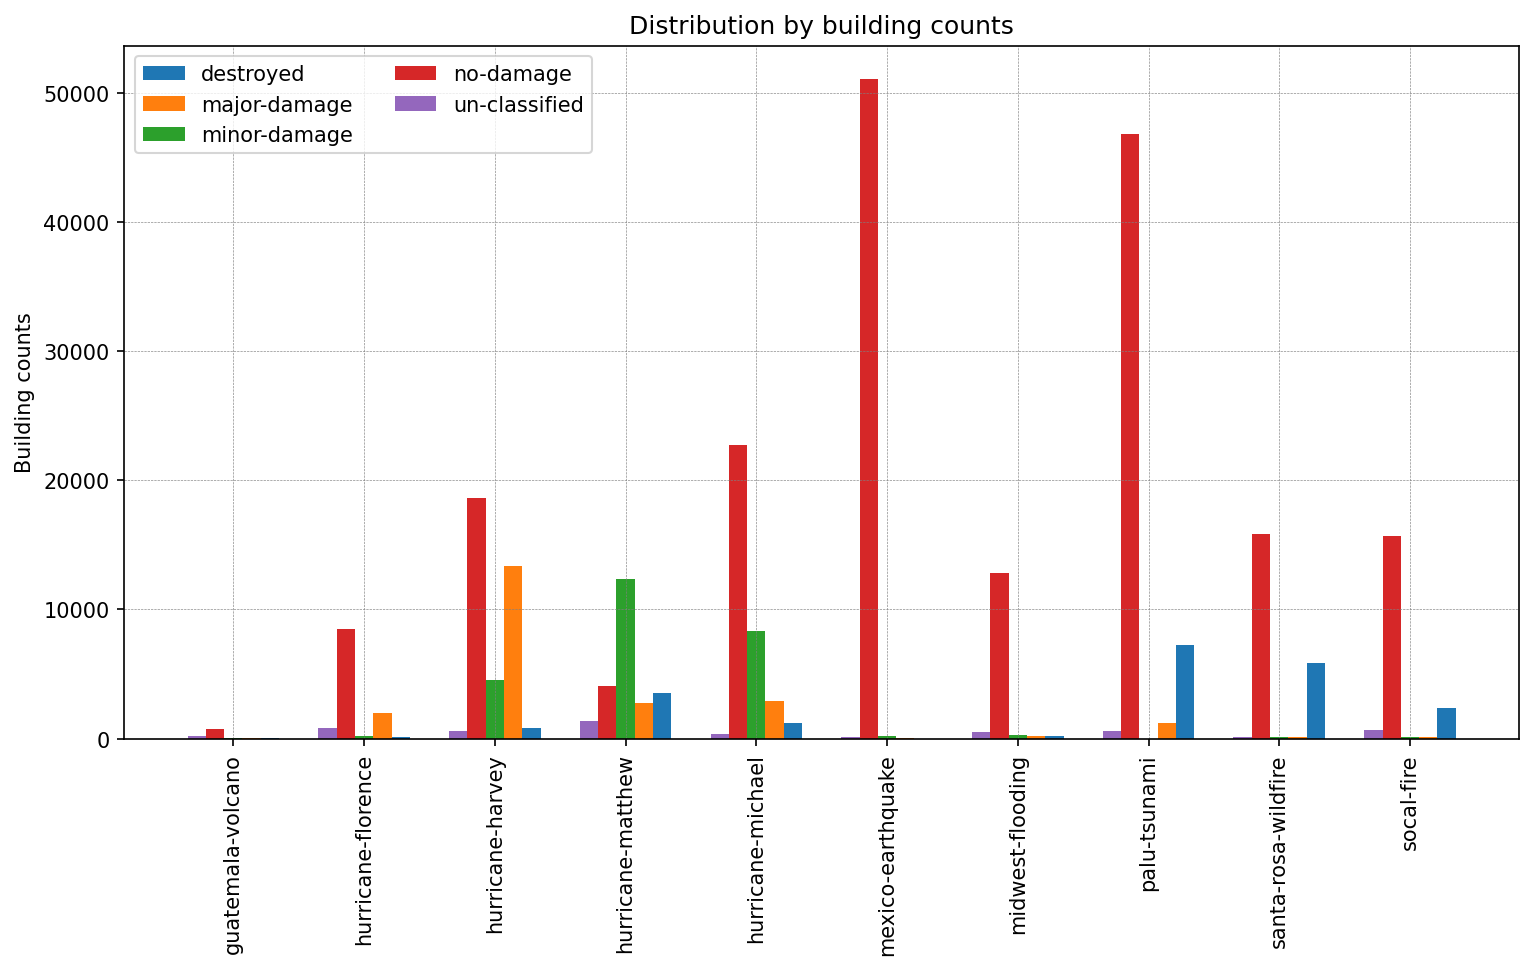

In [32]:
%matplotlib inline

disaster_classes = grouped_multiple['disaster'].nunique()
# print(disaster_classes)
disaster_list = grouped_multiple['dmg_cat'].unique()
print(disaster_list)


x = np.arange(disaster_classes)  # the label locations
# print(x)
width = 1.4/disaster_classes  # the width of the bars
# print(width)
multiplier = 0

fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=150)

for disaster in disaster_list:
  unique_list=grouped_multiple['count'].loc[grouped_multiple['dmg_cat'] == disaster].tolist()
  # print(unique_list)
  x = np.arange(len(unique_list))  # the label locations

  rect = ax.bar(x - (multiplier - 1) * width, unique_list, width, label=disaster)
  multiplier += 1
 
ax.set_ylabel('Building counts')
ax.set_title('Distribution by building counts')
ax.set_xticks(x-width)
ax.set_xticklabels(grouped_multiple['disaster'].unique(), rotation=90)

ax.legend(loc='upper left', ncols=2)

plt.grid(color = 'grey', linestyle = '--', linewidth = 0.3)


plt.show()

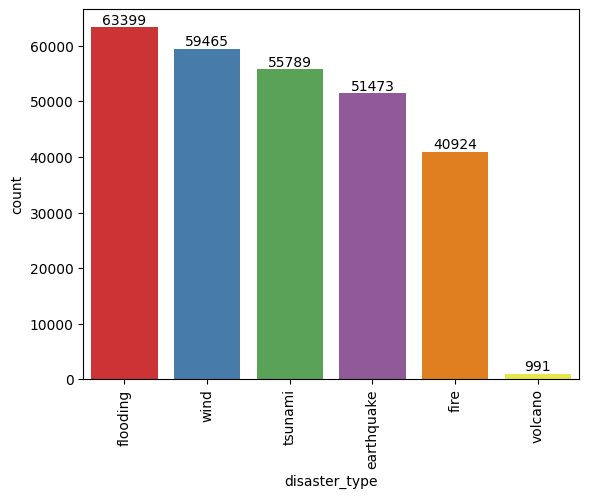

In [33]:
df_all = df_all[df_all.dmg_cat != "none"]
chart = sns.countplot(df_all, x='disaster_type', order=df_all['disaster_type'].value_counts().index, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

for i in chart.containers:
    chart.bar_label(i,)

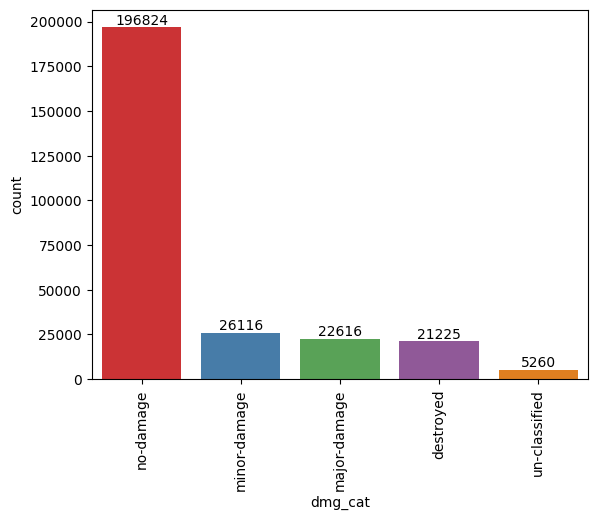

In [34]:
chart = sns.countplot(df_all, x='dmg_cat', order=df_all['dmg_cat'].value_counts().index, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

for i in chart.containers:
    chart.bar_label(i,)